
 ****** Running generation 0 ****** 

Population's average fitness: 2.22222 stdev: 0.34329
Best fitness: 2.99567 - size: (1, 2) - species 1 - id 26
Average adjusted fitness: 0.529
Mean genetic distance 1.288, standard deviation 0.466
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.529     0
Total extinctions: 0
Generation time: 0.012 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.24101 stdev: 0.34531
Best fitness: 2.99567 - size: (1, 2) - species 1 - id 26
Average adjusted fitness: 0.570
Mean genetic distance 1.243, standard deviation 0.498
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.570     1
Total extinctions: 0
Generation time: 0.013 sec (0.012 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.33729 stdev: 0.

Population's average fitness: 2.41914 stdev: 0.46847
Best fitness: 3.00132 - size: (2, 4) - species 1 - id 3784
Average adjusted fitness: 0.410
Mean genetic distance 2.525, standard deviation 1.560
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   29    18      3.0    0.382     4
     2   18    48      3.0    0.465     3
     3    7    33      3.0    0.314     3
     4    6    19      3.0    0.441     1
     5    4    32      3.0    0.450     0
Total extinctions: 0
Generation time: 0.018 sec (0.016 average)
Saving checkpoint to neat-checkpoint-29

 ****** Running generation 30 ****** 

Population's average fitness: 2.36242 stdev: 0.47333
Best fitness: 3.22514 - size: (2, 4) - species 3 - id 4527
Average adjusted fitness: 0.542
Mean genetic distance 2.482, standard deviation 1.469
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
  

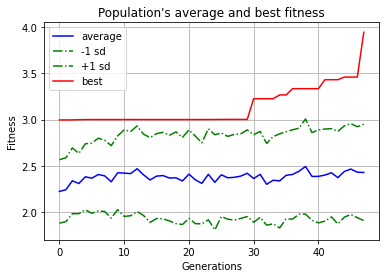

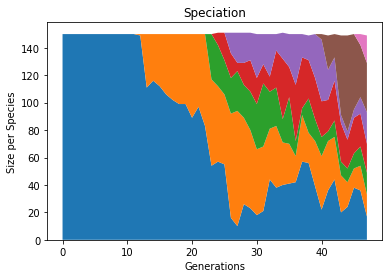

Mean genetic distance 1.317, standard deviation 0.459
Mean genetic distance 1.316, standard deviation 0.454
Mean genetic distance 1.306, standard deviation 0.499
Mean genetic distance 1.232, standard deviation 0.508
Mean genetic distance 1.393, standard deviation 0.434
Mean genetic distance 1.522, standard deviation 0.491
Mean genetic distance 1.909, standard deviation 1.024
Mean genetic distance 1.958, standard deviation 0.938
Mean genetic distance 1.846, standard deviation 0.753
Mean genetic distance 1.770, standard deviation 0.722


In [1]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    # local_dir = os.path.dirname(__file__)
    local_dir = os.path.dirname('')
    config_path = os.path.join(local_dir, 'config-feedforward')
    run(config_path)